# pyglauber: 
## optical vs Monte Carlo (MC) Glauber Modelling of High Energy Collisions at LHC and RHIC; centrality grids; event views

In [2]:
import numpy as np, matplotlib.pyplot as plt
from pyglauber.models import OpticalModel, MonteCarloModel
from pyglauber.utils.analysis import centrality_table, centrality_table_mc
from pyglauber.utils.plotting import (
    plot_TA_map, plot_TpA_map, plot_npart_ncoll_maps,
    plot_transverse_profiles, plot_longitudinal_slice,
    centrality_grid_optical, centrality_grid_mc, plot_mc_event
)
plt.rcParams.update({'figure.figsize':(6,4),'axes.grid':True})

# p+Pb Collisions at LHC @5TeV

## Optical p+Pb @ 5TeV

In [3]:
# LHC p+Pb (Pb target, proton projectile)
opt_pPb = OpticalModel(
    system='pA', target='Pb', energy_GeV=5023, verbose=True,
    rect_pA=True, x_pad=4.0, y_half=10.0, nx_rect=300, ny_rect=400,
    proton_rp=0.975, proton_m=1.85,
    ws_R_override=None, ws_a_override=0.549, ws_n0_override=0.17
)
print("σ_tot [fm^2]:", opt_pPb.sigma_tot(units='fm2'))
print("σ_tot [mb]  :", opt_pPb.sigma_tot(units='mb'))

# Use standard LHC p+Pb centrality bins
# bins = [0,10,20,30,40,50,60,70,80,90,100]
bins = [0,20,40,60,80,100]
rows_pPb_opt = centrality_table(opt_pPb, bins=bins, progress=True)
rows_pPb_opt[:2] + [rows_pPb_opt[-1]]  # peek

TypeError: WoodsSaxon.__init__() got an unexpected keyword argument 'R_override'

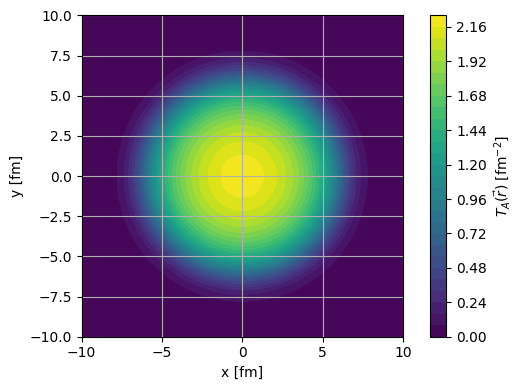

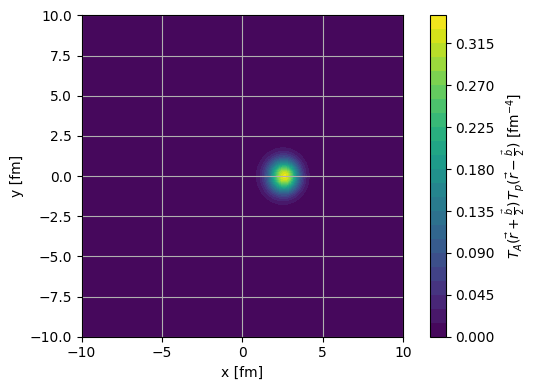

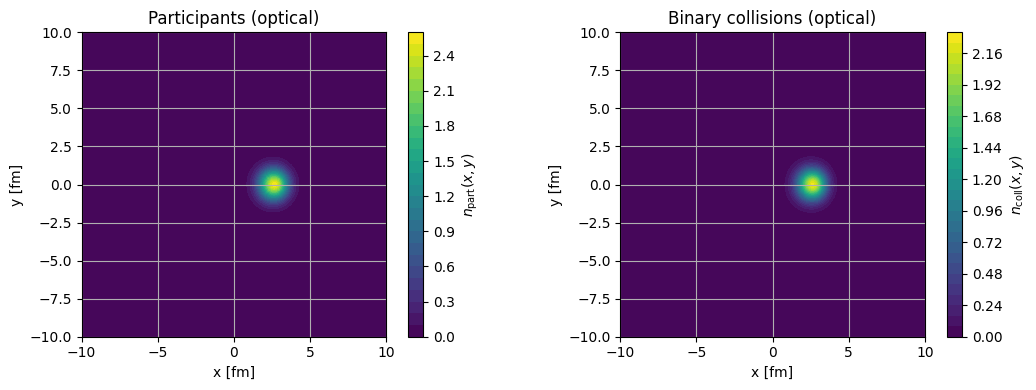

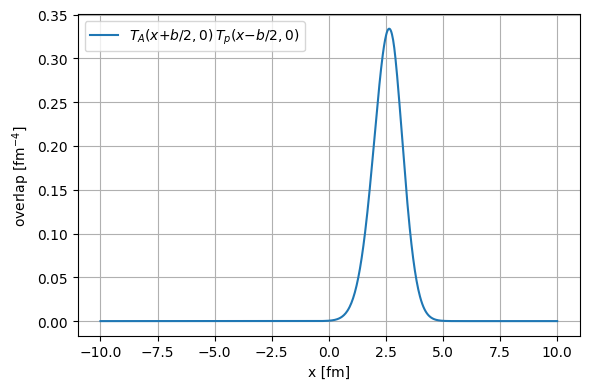

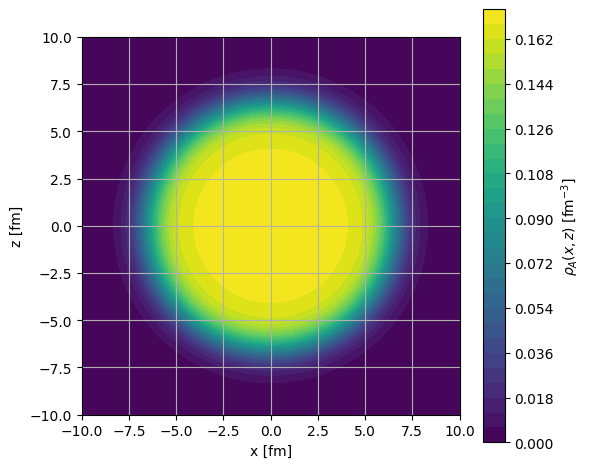

In [16]:
b40_50 = [r for r in rows_pPb_opt if tuple(r["cent"])==(40,60)][0]["b_avg_fm"]

plot_TA_map(opt_pPb, rmax=10.0); plt.show()
plot_TpA_map(opt_pPb, b=b40_50, rmax=10.0); plt.show()
plot_npart_ncoll_maps(opt_pPb, b=b40_50, rmax=10.0); plt.show()
plot_transverse_profiles(opt_pPb, b=b40_50, rmax=10.0); plt.show()
plot_longitudinal_slice(opt_pPb, b=b40_50, x_half=10.0, z_half=10.0); plt.show()

### Maps & profiles

In [17]:
b50 = opt_pPb.b_at_fraction(0.5)
plot_TA_map(opt_pPb, rmax=10.0); plt.show()
plot_TpA_map(opt_pPb, b=b50, rmax=10.0); plt.show()
plot_npart_ncoll_maps(opt_pPb, b=b50, rmax=10.0); plt.show()
plot_transverse_profiles(opt_pPb, b=b50, rmax=10.0); plt.show()
plot_longitudinal_slice(opt_pPb, b=b50, x_half=10.0, z_half=10.0); plt.show()

KeyboardInterrupt: 

## MC p+Pb @ 5TeV

In [ ]:
mc_pPb = MonteCarloModel(system='pA', target='Pb', energy_GeV=5023)
res_pPb = mc_pPb.run(Nevents=12000, progress=True)
print(res_pPb.summary())
centrality_table_mc(res_pPb, bins=[0,20,40,60,80,100])

In [ ]:
ev_pPb = mc_pPb.simulate_one(b=np.sqrt(np.random.rand())*(2.5*mc_pPb.target_ws.R+5.0), keep_positions=True)
plot_mc_event(ev_pPb); plt.show()
plot_mc_event_xz(ev_pPb); plt.show()

## p+Pb: Centrality grids: optical vs MC

In [ ]:
# bins = [(0,5),(10,20),(20,30),(30,40),(40,50),(50,60),(60,70),(70,80),(80,100)]
bins = [(0,20),(20,40),(40,60),(60,80),(80,100)]
centrality_grid_optical(opt_pPb, bins=bins, rmax=9.0); plt.show()
centrality_grid_mc(ev_pPb, res, bins=bins, smear=0.4, rmax=9.0, samples=1); plt.show()

# d+Au @ 200 GeV RHIC

## Optical: d+Au @ 200 GeV RHIC

In [ ]:
# LHC d+Au (Au target, deuteron projectile)
opt_dAu = OpticalModel(system='dA', target='Au', energy_GeV=200, verbose=True)

print("σ_tot [fm^2]:", opt_dAu.sigma_tot(units='fm2'))
print("σ_tot [mb]  :", opt_dAu.sigma_tot(units='mb'))

# Use standard RHIC d+Au centrality bins
bins = [0,20,40,60,80,100]
rows_dAu_opt = centrality_table(opt_dAu, bins=bins, progress=True)
rows_dAu_opt[:2] + [rows_dAu_opt[-1]]  # peek

In [ ]:
b40_50 = [r for r in rows_dAu_opt if tuple(r["cent"])==(40,60)][0]["b_avg_fm"]

plot_TA_map(opt_dAu, rmax=10.0); plt.show()
plot_TpA_map(opt_dAu, b=b40_50, rmax=10.0); plt.show()
plot_npart_ncoll_maps(opt_dAu, b=b40_50, rmax=10.0); plt.show()
plot_transverse_profiles(opt_dAu, b=b40_50, rmax=10.0); plt.show()
plot_longitudinal_slice(opt_dAu, b=b40_50, x_half=10.0, z_half=10.0); plt.show()

## MC d+Au @ 200 GeV

In [ ]:
mc_dAu = MonteCarloModel(system='dA', target='Au', energy_GeV=200)
res_dAu = mc_dAu.run(Nevents=12000, progress=True)
print(res_dAu.summary())
centrality_table_mc(res_dAu, bins=[0,20,40,60,80,100])

## Single MC event (XY and XZ)

In [ ]:
ev_dAu = mc_dAu.simulate_one(b=np.sqrt(np.random.rand())*(2.5*mc_dAu.target_ws.R+5.0), keep_positions=True)
plot_mc_event(ev_dAu); plt.show()
plot_mc_event_xz(ev_dAu); plt.show()

## d+Au: Centrality grids: optical vs MC

In [ ]:
# bins = [(0,5),(10,20),(20,30),(30,40),(40,50),(50,60),(60,70),(70,80),(80,100)]
bins = [(0,20),(20,40),(40,60),(60,80),(80,100)]
centrality_grid_optical(opt_dAu, bins=bins, rmax=9.0); plt.show()
centrality_grid_mc(ev_dAu, res, bins=bins, smear=0.4, rmax=9.0, samples=1); plt.show()

# Pb + Pb @ 5.023 TeV LHC

## Optical: Pb+Pb @ 5.023 

In [ ]:
# LHC Pb+Pb (Pb target, Pb projectile)
opt_PbPb = OpticalModel(system='AA', target='Pb', energy_GeV=5023, verbose=True)

print("σ_tot [fm^2]:", opt_PbPb.sigma_tot(units='fm2'))
print("σ_tot [mb]  :", opt_PbPb.sigma_tot(units='mb'))

# Use standard LHC Pb+Pb centrality bins
# bins = [0,10,20,30,40,50,60,70,80,90,100]
bins = [0,20,40,60,80,100]
rows_PbPb_opt = centrality_table(opt_PbPb, bins=bins, progress=True)
rows_PbPb_opt[:2] + [rows_PbPb_opt[-1]]  # peek

In [ ]:
b40_60 = [r for r in rows_PbPb_opt if tuple(r["cent"])==(40,60)][0]["b_avg_fm"]

plot_TA_map(opt_PbPb, rmax=10.0); plt.show()
plot_TAA_map(opt_PbPb, b=b40_60, rmax=10.0); plt.show()
plot_npart_ncoll_maps(opt_PbPb, b=b40_60, rmax=10.0); plt.show()
plot_transverse_profiles(opt_PbPb, b=b40_60, rmax=10.0); plt.show()
plot_longitudinal_slice(opt_PbPb, b=b40_60, x_half=10.0, z_half=10.0); plt.show()

## MC: Pb+Pb @ 5.023 

In [ ]:
mc_PbPb = MonteCarloModel(system='AA', target='Pb', energy_GeV=5023)
res_PbPb = mc_PbPb.run(Nevents=12000, progress=True)
print(res_PbPb.summary())
centrality_table_mc(res_PbPb, bins=[0,20,40,60,80,100])

In [ ]:
ev_PbPb = mc_PbPb.simulate_one(b=np.sqrt(np.random.rand())*(2.5*mc_PbPb.target_ws.R+5.0), keep_positions=True)
plot_mc_event(ev_PbPb); plt.show()
plot_mc_event_xz(ev_PbPb); plt.show()

# Au + Au @ 200 GeV RHIC

## Optical: Au+Au @ 200 GeV

In [ ]:
# RHIC uAu (AuAu target, projectile)
opt_AuAu = OpticalModel(system='AA', target='Au', energy_GeV=200, verbose=True)

print("σ_tot [fm^2]:", opt_AuAu.sigma_tot(units='fm2'))
print("σ_tot [mb]  :", opt_AuAu.sigma_tot(units='mb'))

# Use standard RHIC AuAu centrality bins
# bins = [0,10,20,30,40,50,60,70,80,90,100]
bins = [0,20,40,60,80,100]
rows_AuAu_opt = centrality_table(opt_AuAu, bins=bins, progress=True)
rows_AuAu_opt[:2] + [rows_AuAu_opt[-1]]  # peek

In [ ]:
b40_60 = [r for r in rows_AuAu_opt if tuple(r["cent"])==(40,60)][0]["b_avg_fm"]

plot_TA_map(opt_AuAu, rmax=10.0); plt.show()
plot_TAA_map(opt_AuAu, b=b40_60, rmax=10.0); plt.show()
plot_npart_ncoll_maps(opt_AuAu, b=b40_60, rmax=10.0); plt.show()
plot_transverse_profiles(opt_AuAu, b=b40_60, rmax=10.0); plt.show()
plot_longitudinal_slice(opt_AuAu, b=b40_60, x_half=10.0, z_half=10.0); plt.show()

## MC: Au+Au @ 200 GeV

In [ ]:
mc_AuAu = MonteCarloModel(system='AA', target='Au', energy_GeV=200)
res_AuAu = mc_AuAu.run(Nevents=12000, progress=True)
print(res_AuAu.summary())
centrality_table_mc(res_AuAu, bins=[0,20,40,60,80,100])

In [ ]:
ev_AuAu = mc_AuAu.simulate_one(b=np.sqrt(np.random.rand())*(2.5*mc_AuAu.target_ws.R+5.0), keep_positions=True)
plot_mc_event(ev_AuAu); plt.show()
plot_mc_event_xz(ev_AuAu); plt.show()

# The End -- Thank you! -- Sabin Thapa (sthapa3@kent.edu).